# **Table of Contents**


### 1. Introduction to Algorithms
   - Introduction
   - Recap

### 2. Selection Sort
   - What you’ll learn about performance
   - Solving problems
   - Binary search
   - Big O notation
   - Memory, Arrays, and Linked Lists
   - Inserting and Deletions
   - Recap

### 3. Recursion
   - Base case and recursive case
   - The call stack
   - Recap

### 4. Quicksort
   - Divide & conquer
   - Big O notation revisited
   - Merge sort vs. quicksort
   - Average vs. worst case
   - Recap

### 5. Hash Tables
   - Hash functions & use cases
   - Collisions
   - Performance & Load factor
   - A good hash function
   - Recap

### 6. Breadth-First Search
   - Introduction to graphs
   - Finding the shortest path
   - Implementing BFS
   - Running time
   - Recap

### 7. Dijkstra’s Algorithm
   - Working with Dijkstra’s algorithm
   - Terminology
   - Negative-weight edges
   - Implementation
   - Recap

### 8. Greedy Algorithms
   - Classroom scheduling problem
   - Knapsack problem
   - Approximation algorithms
   - NP-complete problems
   - Recap

### 9. Dynamic Programming
   - Knapsack problem & FAQ
   - Longest common substring
   - Longest common subsequence
   - Recap

### 10. K-Nearest Neighbors
   - Classifying oranges vs. grapefruit
   - Recommendations system
   - Feature extraction
   - Introduction to machine learning
   - Recap

### 11. Where to Go Next
   - Trees
   - Fourier transform
   - Parallel algorithms
   - MapReduce
   - Bloom filters & HyperLogLog
   - Epilogue


# **1. Selection Sort**

## **Example**

**QUESTION 1:** 

Alice has some cards with numbers written on them. She arranges the cards in decreasing order, and lays them out face down in a sequence on a table. She challenges Bob to pick out the card containing a given number by turning over as few cards as possible. Write a function to help Bob locate the card.

[Explanation in depth](https://jovian.com/learn/data-structures-and-algorithms-in-python/lesson/lesson-1-binary-search-linked-lists-and-complexity)


### **Strategy for solving the problem**

Here's a systematic strategy we'll apply for solving problems:

    - State the problem clearly. Identify the input & output formats.
    - Come up with some example inputs & outputs. Try to cover all edge cases.
    - Come up with a correct solution for the problem. State it in plain English.
    - Implement the solution and test it using example inputs. Fix bugs, if any.
    - Analyze the algorithm's complexity and identify inefficiencies, if any.
    - Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.

#### **1. State the problem clearly. Identify the input & output formats.**

##### **1.1 Problem**

We need to write a program to find the position of a given number in a list of numbers arranged in decreasing order. We also need to minimize the number of times we access elements from the list.

##### **1.2 input**

**cards:** A list of numbers sorted in decreasing order. E.g. [13, 11, 10, 7, 4, 3, 1, 0]

**query:** A number, whose position in the array is to be determined. E.g. 7

##### **1.3 output**

**position:** The position of query in the list cards. E.g. 3 in the above case (counting from 0)

In [23]:
# Based on the above, we can now create the signature of our function:

def locate_card(cards, query):
    pass

#### **2. Come up with some example inputs & outputs. Try to cover all edge cases.**

**Tip:** 

Don't stress it if you can't come up with an exhaustive list of test cases though. You can come back to this section and add more test cases as you discover them. Coming up with good test cases is a skill that takes practice

In [24]:
test = {
    'input': { 
        'cards': [13, 11, 10, 7, 4, 3, 1, 0], 
        'query': 7
    },
    'output': 3
}

tests = []
# query occurs in the middle
tests.append(test)


tests.append({
    'input': {
        'cards': [13, 11, 10, 7, 4, 3, 1, 0],
        'query': 1
    },
    'output': 6
})
# query is the first element
tests.append({
    'input': {
        'cards': [4, 2, 1, -1],
        'query': 4
    },
    'output': 0
})
# query is the last element
tests.append({
    'input': {
        'cards': [3, -1, -9, -127],
        'query': -127
    },
    'output': 3
})
# cards contains just one element, query
tests.append({
    'input': {
        'cards': [6],
        'query': 6
    },
    'output': 0 
})
# cards does not contain query 
tests.append({
    'input': {
        'cards': [9, 7, 5, 2, -9],
        'query': 4
    },
    'output': -1
})
# cards is empty
tests.append({
    'input': {
        'cards': [],
        'query': 7
    },
    'output': -1
})
# numbers can repeat in cards
tests.append({
    'input': {
        'cards': [8, 8, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0],
        'query': 3
    },
    'output': 7
})
# query occurs multiple times
tests.append({
    'input': {
        'cards': [8, 8, 6, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0],
        'query': 6
    },
    'output': 2
})

print(tests)
# locate_card(**test['input']) == test['output']


[{'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}, 'output': 3}, {'input': {'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 1}, 'output': 6}, {'input': {'cards': [4, 2, 1, -1], 'query': 4}, 'output': 0}, {'input': {'cards': [3, -1, -9, -127], 'query': -127}, 'output': 3}, {'input': {'cards': [6], 'query': 6}, 'output': 0}, {'input': {'cards': [9, 7, 5, 2, -9], 'query': 4}, 'output': -1}, {'input': {'cards': [], 'query': 7}, 'output': -1}, {'input': {'cards': [8, 8, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0], 'query': 3}, 'output': 7}, {'input': {'cards': [8, 8, 6, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0], 'query': 6}, 'output': 2}]


#### **3. Come up with a correct solution for the problem. State it in plain English.**

In this problem, coming up with a correct solution is quite easy: Bob can simply turn over cards in order one by one, till he find a card with the given number on it. Here's how we might implement it:

  - Create a variable position with the value 0.
  - Check whether the number at index position in card equals query.
  - If it does, position is the answer and can be returned from the function
  - If not, increment the value of position by 1, and repeat steps 2 to 5 till we reach the last position.
  - If the number was not found, return -1.


    - **Linear Search Algorithm:** Congratulations, we've just written our first algorithm! 

#### **4. Implement the solution and test it using example inputs. Fix bugs, if any.**

We are finally ready to implement our solution. All the work we've done so far will definitely come in handy, as we now exactly what we want our function to do, and we have an easy way of testing it on a variety of inputs.

In [37]:
def locate_card(cards, query):
    position = 0
    while position < len(cards):
        if cards[position] == query:
            return position
        position+=1
        # if position == len(cards):
            # return -1
    return -1


In [35]:
from jovian.pythondsa import evaluate_test_case
from jovian.pythondsa import evaluate_test_cases

print('Single Case:')
print(evaluate_test_case(locate_card,test))
print('\n\n\nAll Cases:')
print(evaluate_test_cases(locate_card,tests))

Single Case:

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3


Actual Output:
3

Execution Time:
0.003 ms

Test Result:
PASSED

(3, True, 0.003)



All Cases:

TEST CASE #0

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3


Actual Output:
3

Execution Time:
0.002 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 1}

Expected Output:
6


Actual Output:
6

Execution Time:
0.002 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'cards': [4, 2, 1, -1], 'query': 4}

Expected Output:
0


Actual Output:
0

Execution Time:
0.001 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'cards': [3, -1, -9, -127], 'query': -127}

Expected Output:
3


Actual Output:
3

Execution Time:
0.002 ms

Test Result:
PASSED


TEST CASE #4

Input:
{'cards': [6], 'query': 6}

Expected Output:
0


Actual Output:
0

Execution Time:
0.001 ms

Test Result:
PASSED


TEST CASE #5

Input:
{'cards': [9, 7, 5, 2, -9], 'quer

#### **5. Analyze the algorithm's complexity and identify inefficiencies, if any.**

 - We implemented the task but still existing other variable of the task where we had been asked to  Minimize the number of times we access elements from the list cards"

- Since we access a list element once in every iteration, for a list of size N we access the elements from the list up to N times. Thus, Bob may need to overturn up to N cards in the worst case, to find the required card.

- So, we must study two terms of data structure and algorithms : 
    - **The Time Complexity**
    - **The Space Complexity**


 - **In the case of linear search:**

    - **The time complexity** of the algorithm is cN for some fixed constant c that depends on the number of operations we perform in each iteration and the time taken to execute a statement. Time complexity is sometimes also called the running time of the algorithm.

    - **The space complexity** is some constant c' (independent of N), since we just need a single variable position to iterate through the array, and it occupies a constant space in the computer's memory (RAM).

- **Big(O) Notation** 
   
   - Worst-case complexity is often expressed using the Big O notation. In the Big O, we drop fixed constants and lower powers of variables to capture the trend of relationship between the size of the input and the complexity of the algorithm i.e. if the complexity of the algorithm is cN^3 + dN^2 + eN + f, in the Big O notation it is expressed as O(N^3) 


**Thus, the time complexity of linear search is O(N) and its space complexity is O(1).**

#### **6. Apply the right technique to overcome the inefficiency. Repeat steps 3 to 6.**

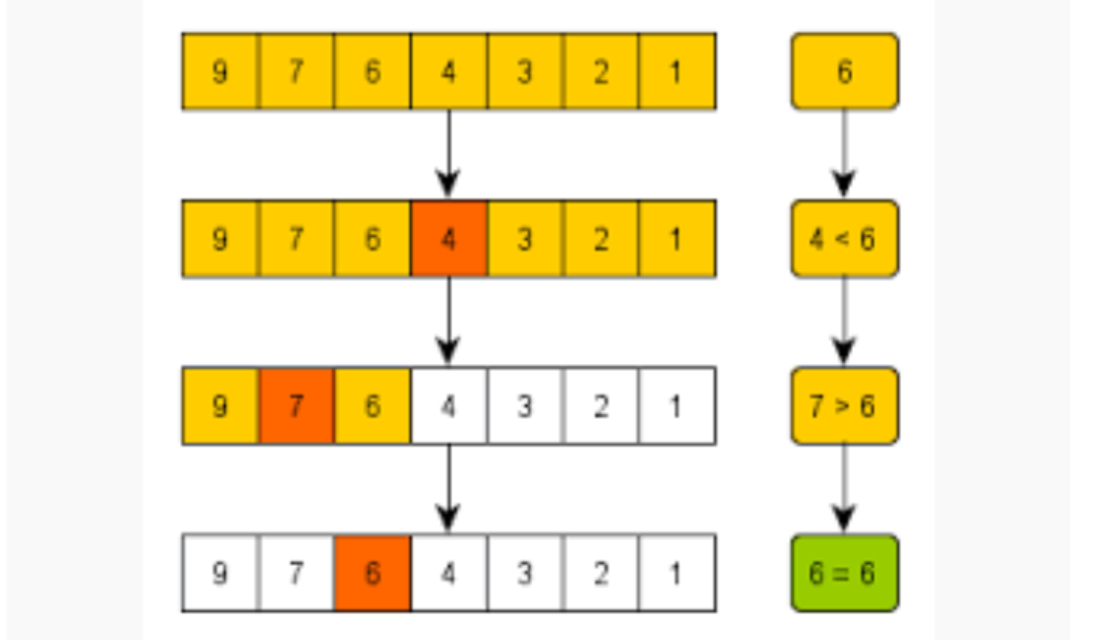






#### **7. Come up with a correct solution for the problem. State it in plain English.**

Here's how **binary search** can be applied to our problem:

 - Find the middle element of the list.
 - If it matches queried number, return the middle position as the answer.
 - If it is less than the queried number, then search the first half of the list
 - If it is greater than the queried number, then search the second half of the list
 - If no more elements remain, return -1.

#### **8. Implement the solution and test it using example inputs. Fix bugs, if any.**

In [44]:
def locate_card_Binary(cards, query):
    lo, hi = 0, len(cards)-1
    while (lo <= hi):
        mid = (lo + hi) // 2
        mid_number = cards[mid]
        print("lo:", lo, ", hi:", hi, ", mid:", mid, ", mid_number:", mid_number)
        if cards[mid] == query:
            return mid
        elif cards[mid] >= query: # right
            lo = mid +1
        else:                     # left
            hi = mid -1
    return -1

print('Single Case:')
print(evaluate_test_case(locate_card_Binary,test))
print('\n\n\nAll Cases:')
print(evaluate_test_cases(locate_card_Binary,tests))

Single Case:

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3

lo: 0 , hi: 7 , mid: 3 , mid_number: 7

Actual Output:
3

Execution Time:
0.032 ms

Test Result:
PASSED

(3, True, 0.032)



All Cases:

TEST CASE #0
lo: 0 , hi: 7 , mid: 3 , mid_number: 7

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3


Actual Output:
3

Execution Time:
0.03 ms

Test Result:
PASSED


TEST CASE #1
lo: 0 , hi: 7 , mid: 3 , mid_number: 7
lo: 4 , hi: 7 , mid: 5 , mid_number: 3
lo: 6 , hi: 7 , mid: 6 , mid_number: 1

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 1}

Expected Output:
6


Actual Output:
6

Execution Time:
0.087 ms

Test Result:
PASSED


TEST CASE #2
lo: 0 , hi: 3 , mid: 1 , mid_number: 2
lo: 0 , hi: 0 , mid: 0 , mid_number: 4

Input:
{'cards': [4, 2, 1, -1], 'query': 4}

Expected Output:
0


Actual Output:
0

Execution Time:
0.059 ms

Test Result:
PASSED


TEST CASE #3
lo: 0 , hi: 3 , mid: 1 , mid_number: -1
lo: 2 , hi: 3 , mi

In [46]:
evaluate_test_case(locate_card_Binary, tests[8])



Input:
{'cards': [8, 8, 6, 6, 6, 6, 6, 6, 3, 2, 2, 2, 0, 0, 0], 'query': 6}

Expected Output:
2

lo: 0 , hi: 14 , mid: 7 , mid_number: 6

Actual Output:
7

Execution Time:
0.049 ms

Test Result:
FAILED



(7, False, 0.049)

In [54]:
"""  
When we find that cards[mid] is equal to query, 
we need to check whether it is the first occurrence 
of query in the list i.e the number that comes before it.
"""

def test_location(cards, query, mid):
    mid_number = cards[mid]
    if mid_number == query:
        if mid-1 >= 0 and cards[mid-1] == query:
            return 'left'
        else:
            return 'found'
    elif mid_number >= query: # right
        return 'right'
    else:                     # left
        return 'left'   

def locate_card_Binary(cards, query):
    lo, hi = 0, len(cards)-1
    while (lo <= hi):
        mid = (lo + hi) // 2
        result = test_location(cards, query, mid)
        if result == 'found':
            return mid
        elif result == 'right':
            lo = mid + 1        
        elif result == 'left':
            hi = mid - 1
    return -1


print('Single Case:')
print(evaluate_test_case(locate_card_Binary,test))
print('\n\n\nAll Cases:')
print(evaluate_test_cases(locate_card_Binary,tests))

Single Case:

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3


Actual Output:
3

Execution Time:
0.005 ms

Test Result:
PASSED

(3, True, 0.005)



All Cases:

TEST CASE #0

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 7}

Expected Output:
3


Actual Output:
3

Execution Time:
0.004 ms

Test Result:
PASSED


TEST CASE #1

Input:
{'cards': [13, 11, 10, 7, 4, 3, 1, 0], 'query': 1}

Expected Output:
6


Actual Output:
6

Execution Time:
0.004 ms

Test Result:
PASSED


TEST CASE #2

Input:
{'cards': [4, 2, 1, -1], 'query': 4}

Expected Output:
0


Actual Output:
0

Execution Time:
0.005 ms

Test Result:
PASSED


TEST CASE #3

Input:
{'cards': [3, -1, -9, -127], 'query': -127}

Expected Output:
3


Actual Output:
3

Execution Time:
0.004 ms

Test Result:
PASSED


TEST CASE #4

Input:
{'cards': [6], 'query': 6}

Expected Output:
0


Actual Output:
0

Execution Time:
0.003 ms

Test Result:
PASSED


TEST CASE #5

Input:
{'cards': [9, 7, 5, 2, -9], 'quer

#### **9. Analyze the algorithm's complexity and identify inefficiencies, if any.**

 - Once again, let's try to count the number of iterations in the algorithm. If we start out with an array of N elements, then each time the size of the array reduces to half for the next iteration, until we are left with just 1 element.
 
**(Iteration k)** - **N/2^k**
Since the final length of the array is 1, we can find the: **N/2^k = 1**. Rearranging the terms, we get: **N = 2^k**. Taking the logarithm : **k = log N**

**Binary Search vs. Linear Search**


In [58]:
large_test = {
    'input': {
        'cards': list(range(10000000, 0, -1)),
        'query': 2
    },
    'output': 9999998
    
} 
result, passed, runtime = evaluate_test_case(locate_card, large_test, display=False)
print("Result: {}\nPassed: {}\nExecution Time: {} ms".format(result, passed, runtime))
result, passed, runtime = evaluate_test_case(locate_card_Binary, large_test, display=False)
print("Result: {}\nPassed: {}\nExecution Time: {} ms".format(result, passed, runtime))

Result: 9999998
Passed: True
Execution Time: 1231.458 ms
Result: 9999998
Passed: True
Execution Time: 0.015 ms


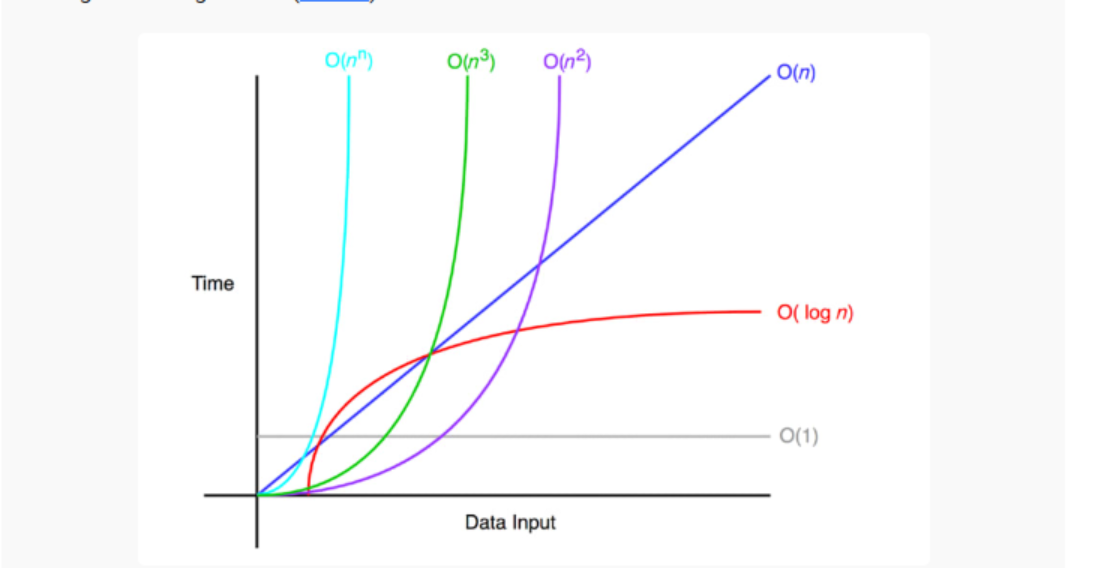